In [120]:
import yfinance as yf

#Make a DataFrame with yfiannce data

df = yf.download("SPY", period = 'max')
print(df.head())


/var/folders/fj/0v013f390gq6x6cshjlkvj7c0000gn/T/ipykernel_10984/3790888101.py:5: FutureWarning: YF.download() has changed argument auto_adjust default to True
  df = yf.download("SPY", period = 'max')
[*********************100%***********************]  1 of 1 completed

Price           Close       High        Low       Open   Volume
Ticker            SPY        SPY        SPY        SPY      SPY
Date                                                           
1993-01-29  24.380436  24.397776  24.276394  24.397776  1003200
1993-02-01  24.553835  24.553835  24.397772  24.397772   480500
1993-02-02  24.605856  24.623196  24.484474  24.536495   201300
1993-02-03  24.865967  24.883307  24.623203  24.640543   529400
1993-02-04  24.970013  25.022034  24.675228  24.952672   531500


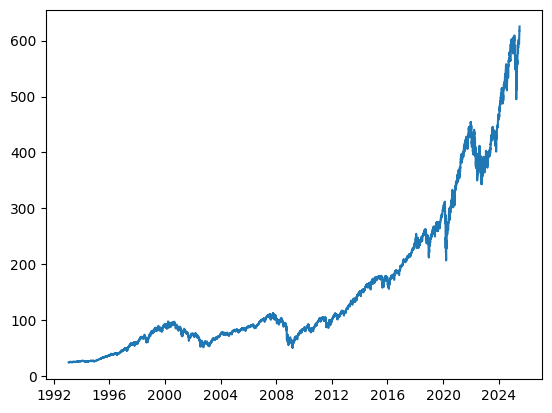

In [121]:
import matplotlib.pyplot as plt

plt.plot(df["Close"])


In [122]:
df["Moving Average"] = df["Close"].rolling(50).mean()

df

Price,Close,High,Low,Open,Volume,Moving Average
Ticker,SPY,SPY,SPY,SPY,SPY,
Date,,,,,,
1993-01-29,24.380436,24.397776,24.276394,24.397776,1003200,NaN
1993-02-01,24.553835,24.553835,24.397772,24.397772,480500,NaN
1993-02-02,24.605856,24.623196,24.484474,24.536495,201300,NaN
1993-02-03,24.865967,24.883307,24.623203,24.640543,529400,NaN
1993-02-04,24.970013,25.022034,24.675228,24.952672,531500,NaN
...,...,...,...,...,...,...
2025-06-27,614.909973,616.390015,610.830017,612.880005,86258400,577.935593
2025-06-30,617.849976,619.219971,615.039978,617.380005,92502500,579.810382


/var/folders/fj/0v013f390gq6x6cshjlkvj7c0000gn/T/ipykernel_10984/1303800539.py:5: FutureWarning: YF.download() has changed argument auto_adjust default to True
  df = yf.download(TICKER, period = 'max')
[*********************100%***********************]  1 of 1 completed


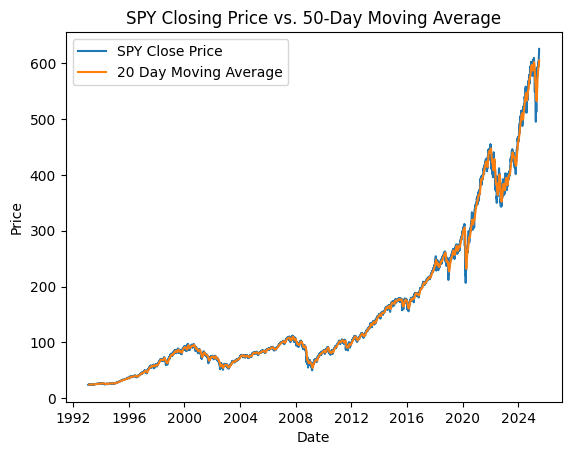

In [123]:
TICKER = 'SPY'
WINDOW = 20


df = yf.download(TICKER, period = 'max')
df["Moving Average"] = df["Close"].rolling(WINDOW).mean()


plt.plot(df["Close"])
plt.plot(df["Moving Average"])
plt.title(f"{TICKER} Closing Price vs. 50-Day Moving Average");
plt.xlabel("Date")
plt.ylabel("Price")
plt.legend([f"{TICKER} Close Price", f"{WINDOW} Day Moving Average"])
plt.show()


In [ ]:
import numpy as np

df.columns = df.columns.get_level_values(0)


def add_ma_strategy(df):

    df["Strategy"] = np.where(df["Close"] > df["Moving Average"], 1, -1)

    return df

df = add_ma_strategy(df)

df["Asset_cumulative"] = np.cumprod(1 + df["Close"].pct_change()) - 1
df["Strategy_cumulative"] = np.cumprod(1 + df["Close"].pct_change() * df["Strategy"].shift) - 1

df

Price,Close,High,Low,Open,Volume,Moving Average,Strategy,Asset_cumulative,Strategy_cumulative
Date,,,,,,,,,
1993-01-29,24.380445,24.397786,24.276404,24.397786,1003200,NaN,-1,NaN,NaN
1993-02-01,24.553839,24.553839,24.397776,24.397776,480500,NaN,-1,0.007112,-0.007112
1993-02-02,24.605865,24.623206,24.484483,24.536504,201300,NaN,-1,0.009246,-0.009216
1993-02-03,24.865959,24.883299,24.623195,24.640536,529400,NaN,-1,0.019914,-0.019689
1993-02-04,24.970020,25.022041,24.675235,24.952680,531500,NaN,-1,0.024182,-0.023791
...,...,...,...,...,...,...,...,...,...
2025-06-27,614.909973,616.390015,610.830017,612.880005,86258400,598.963626,1,24.221441,-0.724676
2025-06-30,617.849976,619.219971,615.039978,617.380005,92502500,600.473486,1,24.342030,-0.723360
2025-07-01,617.650024,618.830017,615.520020,616.359985,70030100,601.807840,1,24.333828,-0.723450


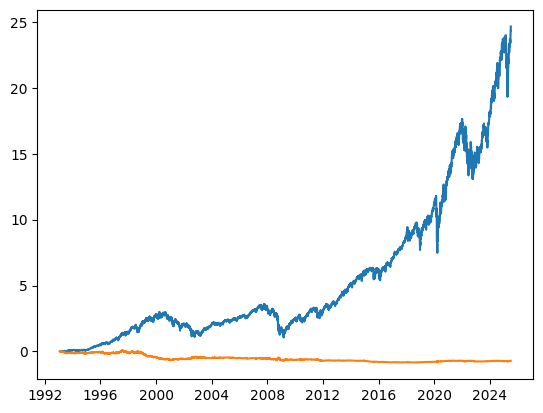

In [125]:
plt.plot(df["Asset_cumulative"])
plt.plot(df["Strategy_cumulative"])

In [134]:
import matplotlib.pyplot as plt
import yfinance as yf
import numpy as np
import pandas as pd

/var/folders/fj/0v013f390gq6x6cshjlkvj7c0000gn/T/ipykernel_10984/1413095197.py:10: FutureWarning: YF.download() has changed argument auto_adjust default to True
  df = yf.download(TICKER, period = 'max')
[*********************100%***********************]  1 of 1 completed


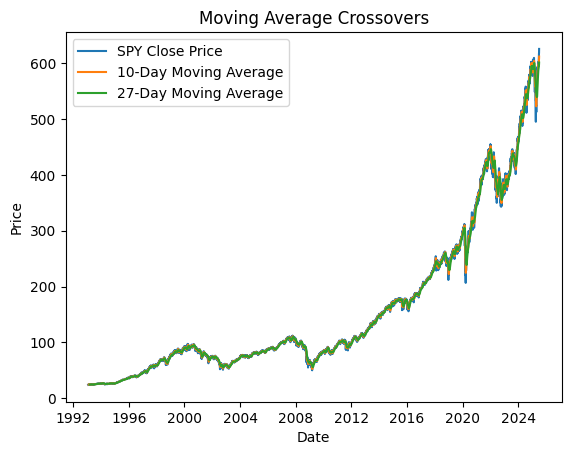

Price,Close,High,Low,Open,Volume,Moving Average,10_ma,27_ma,Strategy,Strategy_Returns,Asset_Returns
Ticker,SPY,SPY,SPY,SPY,SPY,,,,,,
Date,,,,,,,,,,,
1993-11-11,26.199993,26.341233,26.182338,26.270613,88900,25.308219,26.222944,26.245110,NaN,NaN,NaN
1993-11-12,26.323599,26.411874,26.235324,26.252979,108200,25.317935,26.208822,26.254919,-1.0,-0.004718,0.004718
1993-11-15,26.305910,26.376530,26.235290,26.376530,243300,25.326696,26.185870,26.266689,-1.0,-0.004049,0.004043
1993-11-16,26.429493,26.447148,26.252943,26.358873,492600,25.335814,26.177040,26.281728,-1.0,-0.008728,0.008760
1993-11-17,26.288271,26.447166,26.217651,26.447166,39600,25.342925,26.187634,26.289574,-1.0,-0.003431,0.003369
...,...,...,...,...,...,...,...,...,...,...,...
2025-06-27,614.909973,616.390015,610.830017,612.880005,86258400,577.792832,602.270172,595.333607,1.0,-0.440888,22.469852
2025-06-30,617.849976,619.219971,615.039978,617.380005,92502500,578.171888,604.531140,596.324253,1.0,-0.438215,22.582066


In [ ]:

#Entire Program
TICKER = 'SPY'
WINDOW = 200
FAST = 10
SLOW = 27
LOOKBACK = 10000


def get_data():
    df = yf.download(TICKER, period = 'max')
    df["Moving Average"] = df["Close"].rolling(WINDOW).mean()   
    return df

def add_moving_average(df, fast, slow):
    df[f'{FAST}_ma'] = df["Close"].rolling(FAST).mean()
    df[f'{SLOW}_ma'] = df["Close"].rolling(SLOW).mean()

    # taking a chunk for plotting/analysing
    subset = df.iloc[-LOOKBACK:, :]

    plt.plot(subset["Close"])
    plt.plot(subset[f'{FAST}_ma'])
    plt.plot(subset[f'{SLOW}_ma'])
                
    plt.title("Moving Average Crossovers")
    plt.xlabel("Date")
    plt.ylabel("Price")
    plt.legend([f"{TICKER} Close Price", f"{FAST}-Day Moving Average", f"{SLOW}-Day Moving Average"])
    plt.show()
    return df.dropna()

def add_strategy(df, fast, slow):

    # long when fast MA > slow MA, short otherwise 
    df["Strategy"] = np.where(df[f"{FAST}_ma"] > df[f"{SLOW}_ma"], 1, -1)
    df["Strategy"] = df["Strategy"].shift(1)  # Shift to avoid lookahead bias

    return df
    



def test_strategy(df, ticker):):
    returns = df["Close"].squeeze().pct_change()
    df["Strategy_Returns"] = (1 + returns * df["Strategy"]).cumprod() - 1
    df["Asset_Returns"] = np.cumprod(1 + df["Close"].pct_change()) - 1

    # taking a chunk for plotting/analysing
    subset = df.iloc[-LOOKBACK:, :]

    plt.plot(subset["Close"])
    plt.plot(subset[f'{FAST}_ma'])
    plt.plot(subset[f'{SLOW}_ma'])
                
    plt.title("Moving Average Crossovers")
    plt.xlabel("Date")
    plt.ylabel("Price")
    plt.legend(
    plt.show()
    
    return df

df = get_data()
df = add_moving_average(df, FAST, SLOW)
df = add_strategy(df, FAST, SLOW)
df = test_strategy(df)

df



In [148]:
# There are two parts of iloc - rows, columns - seperated by a comma
subsection = df.iloc[-300:, :]





/var/folders/fj/0v013f390gq6x6cshjlkvj7c0000gn/T/ipykernel_10984/1413095197.py:10: FutureWarning: YF.download() has changed argument auto_adjust default to True
  df = yf.download(TICKER, period = 'max')
[*********************100%***********************]  1 of 1 completed


Price,Close,High,Low,Open,Volume,Moving Average,Strategy,Asset_cumulative,Strategy_cumulative
Date,,,,,,,,,
1993-01-29,24.380447,24.397788,24.276406,24.397788,1003200,NaN,NaN,NaN,NaN
1993-02-01,24.553839,24.553839,24.397776,24.397776,480500,NaN,-1.0,0.007112,-0.007112
1993-02-02,24.605862,24.623202,24.484480,24.536501,201300,NaN,-1.0,0.009246,-0.009216
1993-02-03,24.865965,24.883305,24.623201,24.640541,529400,NaN,-1.0,0.019914,-0.019689
1993-02-04,24.970022,25.022043,24.675237,24.952682,531500,NaN,-1.0,0.024182,-0.023791
...,...,...,...,...,...,...,...,...,...
2025-06-27,614.909973,616.390015,610.830017,612.880005,86258400,577.792832,1.0,24.221439,2.274147
2025-06-30,617.849976,619.219971,615.039978,617.380005,92502500,578.171888,1.0,24.342028,2.289801
2025-07-01,617.650024,618.830017,615.520020,616.359985,70030100,578.522140,1.0,24.333827,2.288736


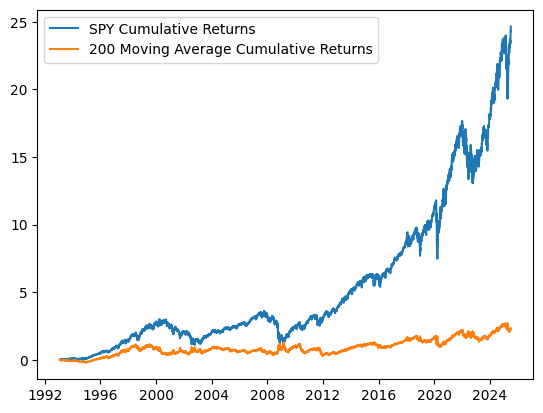

In [149]:
def add_moving_average(df):
    df.columns = df.columns.get_level_values(0)
    df["Strategy"] = np.where(df["Close"] > df["Moving Average"], 1, -1)
    df["Strategy"] = df["Strategy"].shift(1)  # Shift strategy to avoid lookahead bias
    return df

def test_strategy(df):
    df["Asset_cumulative"] = np.cumprod(1 + df["Close"].pct_change()) - 1
    df["Strategy_cumulative"] = np.cumprod(1 + df["Close"].pct_change() * df["Strategy"]) - 1

    # Plotting the results
    plt.plot(df["Asset_cumulative"])
    plt.plot(df["Strategy_cumulative"])
    plt.legend([f"{TICKER} Cumulative Returns", f"{WINDOW} Moving Average Cumulative Returns"])
    return df 


def main():
    df = get_data()
    df = add_moving_average(df)
    df = test_strategy(df)
    return df 

main()